In [27]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


In [49]:
df = pd.read_csv("../data/lead_data_expanded.csv")

In [50]:
# Clean county names
df["County"] = df["County"].str.strip().str.title()


In [64]:
county_summary = (
    df.groupby("County")["target_col"]
      .mean()  # proportion of 1's
      .reset_index(name="pct_target_1")
)

county_summary["pct_target_1"] *= 100  # convert to percent

In [65]:
# US counties shapefile
url = "https://www2.census.gov/geo/tiger/TIGER2022/COUNTY/tl_2022_us_county.zip"
us_counties = gpd.read_file(url)

# filter to NY state
ny_counties = us_counties[us_counties["STATEFP"] == "36"].copy()

# clean county names
ny_counties["County"] = ny_counties["NAME"].str.strip().str.title()


In [66]:
merged = ny_counties.merge(county_summary, on="County", how="left")
merged["pct_target_1"] = merged["pct_target_1"].fillna(0)


In [67]:
merged_3857 = merged.to_crs(epsg=3857)


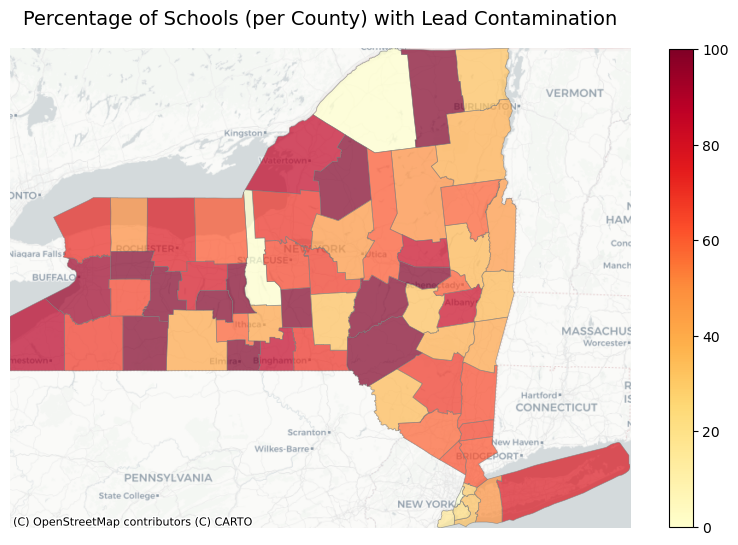

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))

merged_3857.plot(
    column="pct_target_1",
    cmap="YlOrRd",
    edgecolor="gray",
    linewidth=0.5,
    alpha=0.7,
    legend=True,
    ax=ax,
    legend_kwds={"shrink": 0.62}
)

# set map bounds to data
ax.set_xlim(merged_3857.total_bounds[0], merged_3857.total_bounds[2])
ax.set_ylim(merged_3857.total_bounds[1], merged_3857.total_bounds[3])

# add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=7)

ax.set_title("Percentage of Schools (per County) with Lead Contamination", fontsize=14)
ax.axis("off")
plt.savefig("county_map.png")
plt.show()
